In [1]:
import warnings
warnings.filterwarnings('ignore')

# Анализ собранных отзывов

Корректность проверена на:

+ python 3.8.8
+ pandas 1.2.4
+ numpy 1.20.1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#загрузим данные из файла
all_reviews = pd.read_csv('Reviews_CryptoApp.csv')
#посмотрим на них
all_reviews.head()

,rating,app_review_text,timestamp,userName,app_name,marketplace,country
0,4,"Great app. So far I am very new to this app, h...",2021-08-25 19:03:14,$cashguy$,Crypto.com,Apple App Store,us
1,5,Wonderful Crypto App Review Rating. I was so d...,2022-12-09 20:29:00,Joann172,Crypto.com,Apple App Store,us
2,5,Definitely sufficient wonderful app review. I ...,2023-01-13 19:40:15,Theodore$2G4,Crypto.com,Apple App Store,us
3,5,Excellent trading service app. I was so dissat...,2022-12-22 22:09:16,KayT07839$,Crypto.com,Apple App Store,us
4,5,A great crypto app 💯. I was impatient to carry...,2022-11-29 02:23:55,Maria Bronce 🍀🥰🍀,Crypto.com,Apple App Store,us


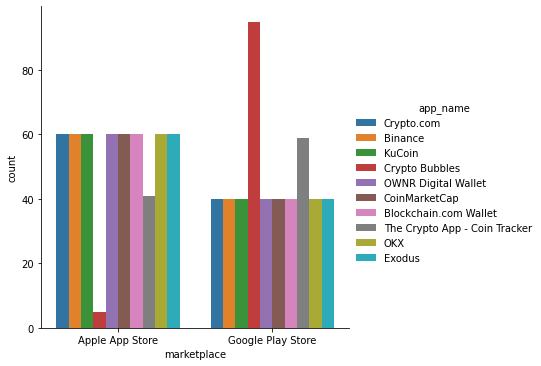

In [4]:
#сколько отзывов по каждому приложению
sns.catplot(x='marketplace', kind='count', hue='app_name', data=all_reviews);

In [5]:
#посмотрим на цифры по количеству отзывов
ct = pd.crosstab(all_reviews.app_name, all_reviews.marketplace, margins=True, margins_name="Total")
ct

marketplace,Apple App Store,Google Play Store,Total
app_name,,,
Binance,60,40,100
Blockchain.com Wallet,60,40,100
CoinMarketCap,60,40,100
Crypto Bubbles,5,95,100
Crypto.com,60,40,100
Exodus,60,40,100
KuCoin,60,40,100
OKX,60,40,100
OWNR Digital Wallet,60,40,100


## Analyzing dates

In [6]:
#посмотрим на разброс дат таблицей
all_reviews["timestamp"] = all_reviews["timestamp"].astype("datetime64") 
df_date = all_reviews.copy()
df_date = df_date.drop(['rating','app_review_text','app_name','marketplace','country','userName'], axis=1)
df_date.groupby([df_date['timestamp'].dt.year,df_date['timestamp'].dt.month]).count()

timestamp
timestamp timestamp           
2017      11                 1
2018      3                  1
          5                  2
          6                  1
          10                 1
          11                 2
          12                 1
2019      2                  1
          3                  1
          4                  1
          5                  2
          6                  1
          7                  2
          9                  4
          10                 2
          11                 1
          12                 3
2020      1                  6
          2                  2
          3                  1
          5                  3
          6                  3
          7                 31
          8                  8
          9                 16
          10                19
          11                 9
          12                 6
2021      1                 12
          2                 23
          3                 16
          4                 21
          5                 30
          6                 29
          7                 10
          8                  8
          9                 21
          10                21
          11                23
          12                23
2022      1                 17
          2                 16
          3                 11
          4                 15
          5                 12
          6                 12
          7                  6
          8                 13
          9                 28
          10                37
          11                67
          12                39
2023      1                359

Text(0.5, 1.0, 'собранные отзывы по периодам')

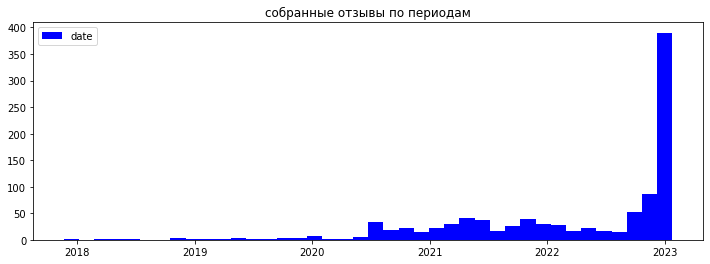

In [7]:
#посмотрим на разброс дат гистограммой
plt.figure(figsize=(12, 4))
plt.hist(df_date, bins = 40,color = 'b', label = 'date')
plt.legend()
plt.title("собранные отзывы по периодам")

## Analyzing rating

In [8]:
#посмотрим на данные по рейтингам
all_reviews.describe()

,rating
count,1000.000000
mean,3.735000
std,1.670798
min,1.000000
25%,2.000000
50%,5.000000
75%,5.000000
max,5.000000


In [9]:
#посмотрим на распределение рейтингов по всем отзывам
all_reviews.rating.value_counts()

5    571
1    222
4     97
2     60
3     50
Name: rating, dtype: int64

<AxesSubplot:title={'center':'rating all apps'}, ylabel='Frequency'>

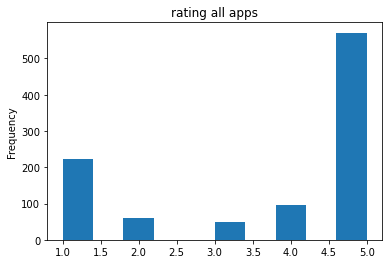

In [10]:
#посмотрим на гистограмму рейтингов по всем отзывам
all_reviews.rating.plot(kind='hist', title = 'rating all apps')

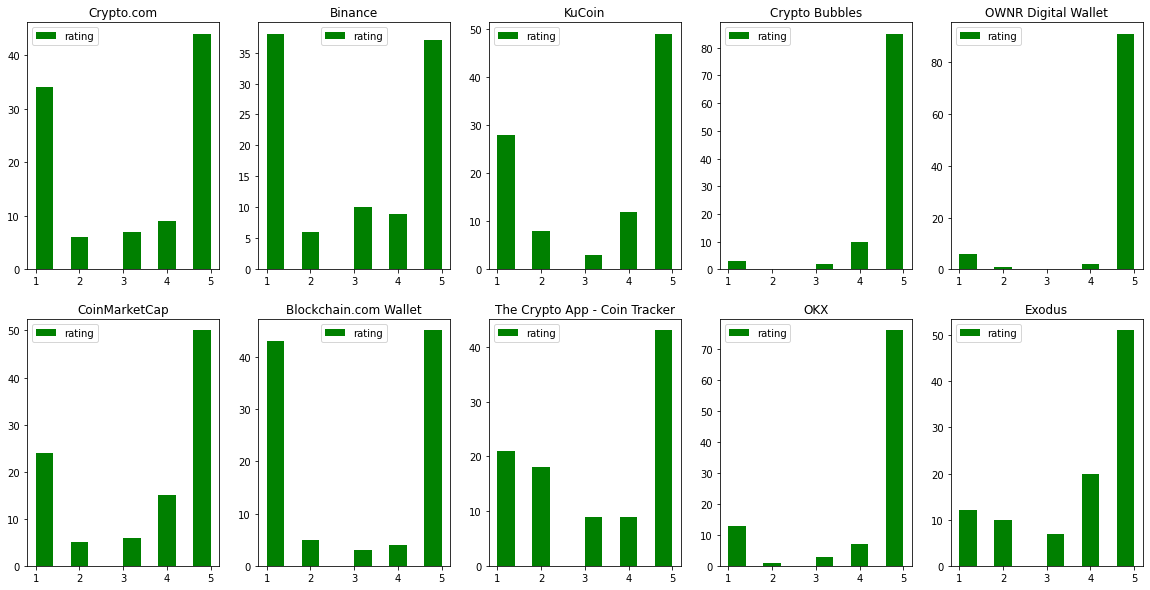

In [11]:
#прочитаем файл со списком приложений
crypto_app = pd.read_csv('cryptocurrency-related applications.csv')

#посмотрим на распределения рейтингов по каждому приложению
plt.figure(figsize=(20, 10))
i = 0
for row_app in crypto_app.itertuples():
    app_name = row_app[1]
    i +=1
    plt.subplot(2,5,i)
    plt.hist(all_reviews[all_reviews.app_name == app_name].rating.values, color = 'g', label = 'rating')
    plt.legend()
    plt.title(app_name)

plt.show()

## Analyzing text statistics

<AxesSubplot:>

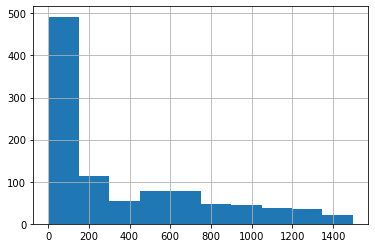

In [12]:
#sentence length analysis
all_reviews['app_review_text'].str.len().hist()

The histogram shows that reviews range from 0 to 1500 characters and generally, it is between 0 to 300 characters.

In [13]:
#word number histogram
def plot_word_number_histogram(text):
    text.str.split().map(lambda x: len(x)).hist()

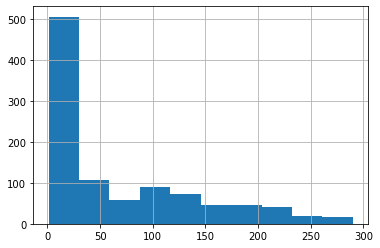

In [14]:
plot_word_number_histogram(all_reviews['app_review_text'])

It is clear that the number of words in reviews ranges from 1 to 280 and mostly falls between 1 to 27 words.

<AxesSubplot:>

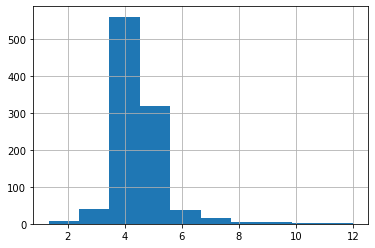

In [15]:
#average word length in each sentence
all_reviews['app_review_text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

The average word length ranges between 2 to 7 with 4 being the most common length. 

In [16]:
import nltk
from nltk.corpus import stopwords
from collections import  Counter
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Мария\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Мария\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Мария\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# top non-stopwords barchart

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:70]:
        if (word.lower() not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

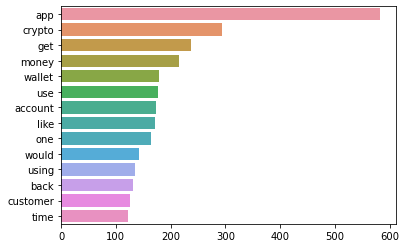

In [18]:
plot_top_non_stopwords_barchart(all_reviews['app_review_text'])

The 'app', 'crypto', 'get', 'money', 'wallet', 'use', 'account' dominate the app reviews.

In [19]:
# top N-grams barchart
def plot_top_ngrams_barchart(text, n=2):

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

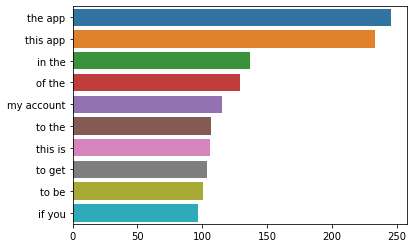

In [20]:
plot_top_ngrams_barchart(all_reviews['app_review_text'],2)

We can observe that the bigrams such as 'the app', 'this app' and 'my account' that are related to war dominate the reviews.

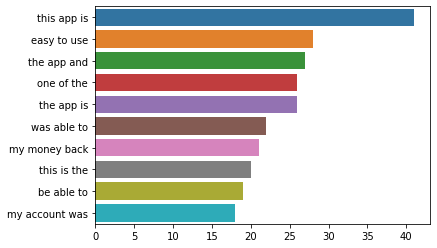

In [21]:
plot_top_ngrams_barchart(all_reviews['app_review_text'],3)

We can see the trigrams: 'easy to use' and 'my money back'.

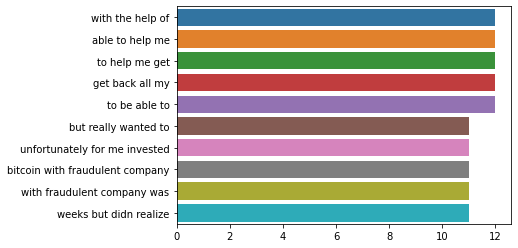

In [22]:
plot_top_ngrams_barchart(all_reviews['app_review_text'],4)

We can see the four-grams 'fraudulent company' and 'help me'.

## Wordcloud

In [23]:
def plot_wordcloud(text):
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w.lower() not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(background_color='white', stopwords=set(STOPWORDS),
                          max_words=100, max_font_size=30, 
                          scale=3, random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

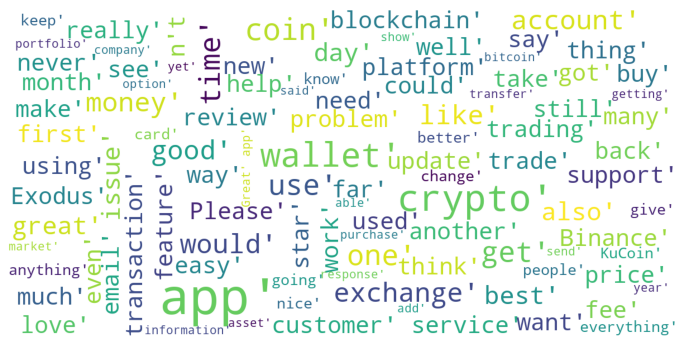

In [34]:
plot_wordcloud(all_reviews['app_review_text'])

You can see that the terms associated with the crypto and app are highlighted which indicates that these words occurred frequently in the reviews.